<a href="https://colab.research.google.com/github/EvelynGeovanna/EV_PORTAFO/blob/main/Evelyn__BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bussiness Case: Optimización y creciemiento del ecosistema del pagos en Ualá México

##Evelyn Geovanna Pérez

# Importar librerias

In [2]:
!pip install pandas matplotlib seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar y preparar datos

In [14]:
# Archivo
df = pd.read_csv("/content/Comportamiento_de_Clientes_con_Tarjeta_de_D_bito.csv")
df

,cliente_id,fecha,cash_in_mxn,cash_out_mxn,pago_servicios_mxn,recargas_mxn,remesas_mxn,uso_tpv_mxn,portabilidad_nomina
0,C00000,2023-01-31,1303.12,1831.76,0,188,720,1944.92,0
1,C00000,2023-02-28,1237.92,1141.87,200,190,0,615.43,0
2,C00000,2023-03-31,2047.15,301.73,400,288,1444,1456.06,0
3,C00000,2023-04-30,1805.17,1558.04,0,108,0,1097.66,0
4,C00000,2023-05-31,873.12,845.51,600,290,0,663.18,0
...,...,...,...,...,...,...,...,...,...
23995,C00999,2024-08-31,975.43,1814.90,200,0,0,2142.98,0
23996,C00999,2024-09-30,1632.36,1679.32,400,263,413,198.36,0
23997,C00999,2024-10-31,1183.77,1033.93,1000,165,0,177.12,0
23998,C00999,2024-11-30,278.81,1267.18,600,236,0,2751.94,0


# Limpieza de la data


In [15]:
 # Limpieza de datos
df['fecha'] = pd.to_datetime(df['fecha'])  # Convertir a fecha
df['mes'] = df['fecha'].dt.to_period('M')  # Crear columna de mes
df

,cliente_id,fecha,cash_in_mxn,cash_out_mxn,pago_servicios_mxn,recargas_mxn,remesas_mxn,uso_tpv_mxn,portabilidad_nomina,mes
0,C00000,2023-01-31,1303.12,1831.76,0,188,720,1944.92,0,2023-01
1,C00000,2023-02-28,1237.92,1141.87,200,190,0,615.43,0,2023-02
2,C00000,2023-03-31,2047.15,301.73,400,288,1444,1456.06,0,2023-03
3,C00000,2023-04-30,1805.17,1558.04,0,108,0,1097.66,0,2023-04
4,C00000,2023-05-31,873.12,845.51,600,290,0,663.18,0,2023-05
...,...,...,...,...,...,...,...,...,...,...
23995,C00999,2024-08-31,975.43,1814.90,200,0,0,2142.98,0,2024-08
23996,C00999,2024-09-30,1632.36,1679.32,400,263,413,198.36,0,2024-09
23997,C00999,2024-10-31,1183.77,1033.93,1000,165,0,177.12,0,2024-10
23998,C00999,2024-11-30,278.81,1267.18,600,236,0,2751.94,0,2024-11


# Métricas clave

In [16]:
# Total de transacciones por fila
df['total_transacciones'] = df[['cash_in_mxn', 'cash_out_mxn', 'pago_servicios_mxn',
                                'recargas_mxn', 'remesas_mxn', 'uso_tpv_mxn']].sum(axis=1)

# Ticket promedio mensual por cliente
ticket_promedio = df.groupby('cliente_id')['total_transacciones'].mean().reset_index()
ticket_promedio.columns = ['cliente_id', 'ticket_promedio']

# Frecuencia de uso (meses activos)
frecuencia = df.groupby('cliente_id')['mes'].nunique().reset_index()
frecuencia.columns = ['cliente_id', 'frecuencia_mensual']

# Unir métricas
df_clientes = pd.merge(ticket_promedio, frecuencia, on='cliente_id')

Moda, rango, percentiles, coeficientes de asimetría y curtosis.

In [36]:
from scipy.stats import skew, kurtosis

for col in df.select_dtypes(include='number'):
    print(f'{col}: Skewness = {skew(df[col])}, Kurtosis = {kurtosis(df[col])}')

cash_in_mxn: Skewness = 1.3970930958853744, Kurtosis = 2.8660050225938676
cash_out_mxn: Skewness = 1.4125188997059734, Kurtosis = 3.046067247360586
pago_servicios_mxn: Skewness = 0.7248648390244692, Kurtosis = 0.48040733240061684
recargas_mxn: Skewness = 0.3722929204321554, Kurtosis = -1.324944909652414
remesas_mxn: Skewness = 1.6140325369137638, Kurtosis = 1.1760283024740694
uso_tpv_mxn: Skewness = 1.4161265663301954, Kurtosis = 2.9707697541123226
portabilidad_nomina: Skewness = 7.121113230518454, Kurtosis = 48.710253641864945
total_transacciones: Skewness = 0.8109008193708696, Kurtosis = 0.9968026293557903


# Productos

Análisis temporal del compartamiento

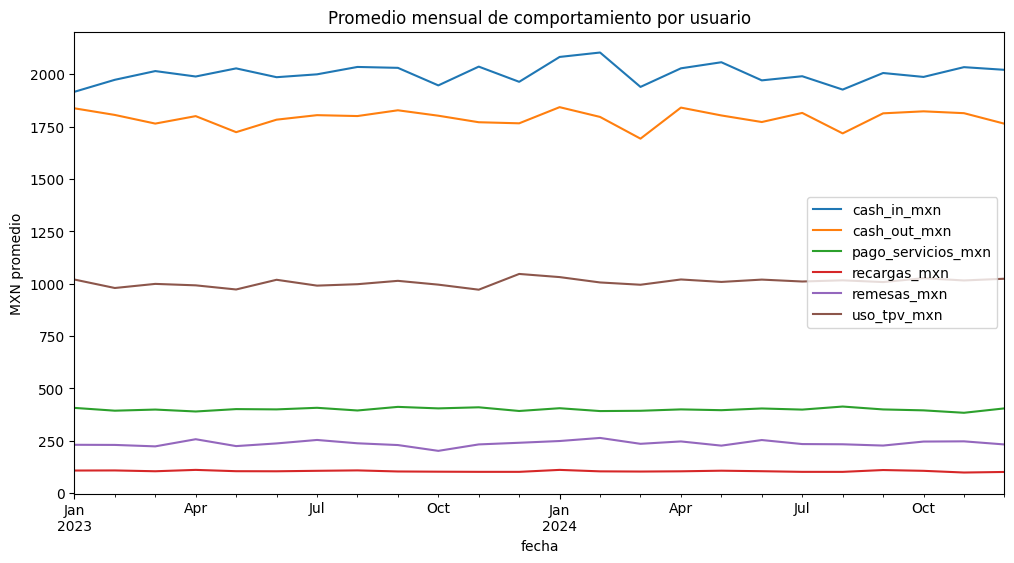

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupamos por fecha
df_grouped = df.groupby('fecha')[[
    'cash_in_mxn', 'cash_out_mxn', 'pago_servicios_mxn',
    'recargas_mxn', 'remesas_mxn', 'uso_tpv_mxn'
]].mean()

df_grouped.plot(figsize=(12,6), title="Promedio mensual de comportamiento por usuario")
plt.ylabel("MXN promedio")
plt.show()


## Análisis individual

**a. Cash-In vs Cash-Out**

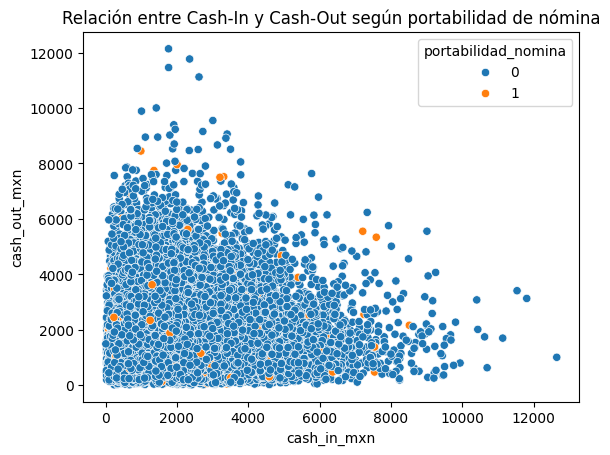

In [39]:
sns.scatterplot(data=df, x='cash_in_mxn', y='cash_out_mxn', hue='portabilidad_nomina')
plt.title('Relación entre Cash-In y Cash-Out según portabilidad de nómina')
plt.show()


Si los usuarios con portabilidad de nómina (valor = 1) tienen mayor cash-in, es una oportunidad clara para impulsar esa función.

**b. Remesas y uso de TPV**

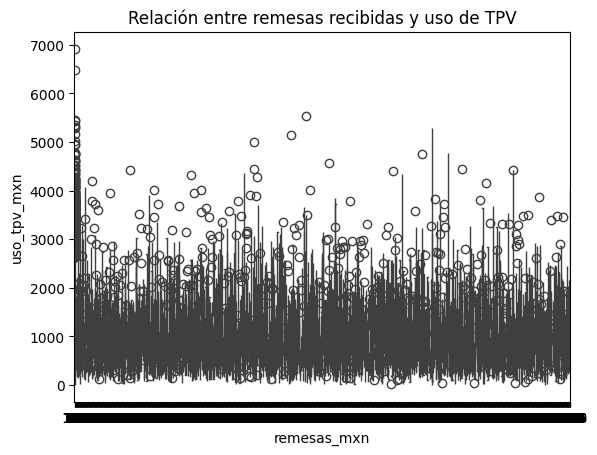

In [40]:
sns.boxplot(x='remesas_mxn', y='uso_tpv_mxn', data=df)
plt.title('Relación entre remesas recibidas y uso de TPV')
plt.show()


#Segmentación de clientes

Clasificamos a los clientes en 4 grupos de acuerdo a su ticket promedio.

Lo cual nos permite diseñar estrategias diferenciadas para cada grupo:

*   Incentivos para los de alto valor
*   Activación para los de bajo valor



In [17]:
# Clasificación en cuartiles
df_clientes['segmento'] = pd.qcut(df_clientes['ticket_promedio'], q=4,
                                  labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

# Unir al dataframe original
df = pd.merge(df, df_clientes[['cliente_id', 'segmento']], on='cliente_id')

Se mostrara la dispersión del gasto mensual por tipo de cliente, asi como ayudar a detectar outliers y oportunidades de personalización.

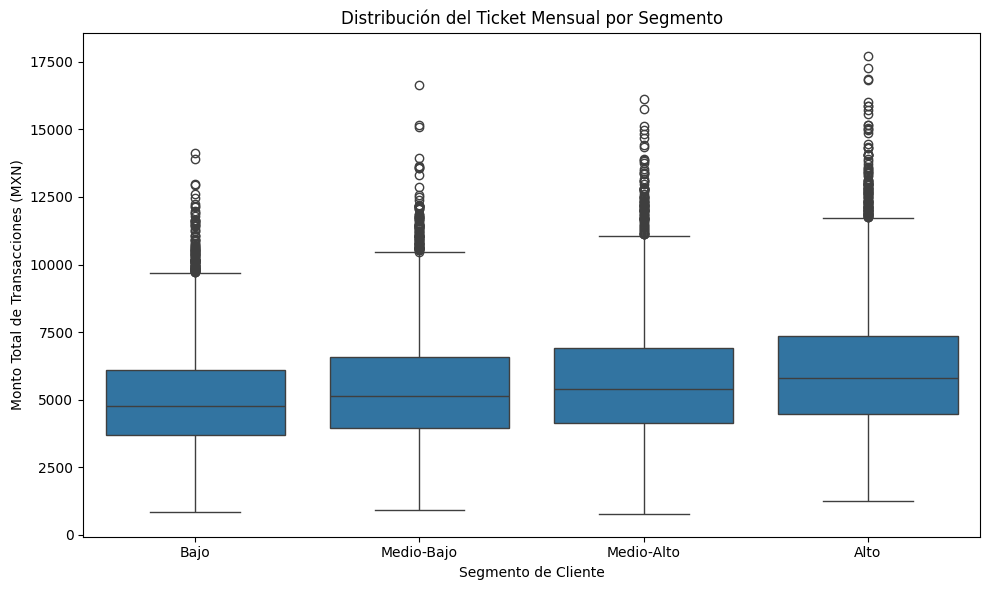

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='segmento', y='total_transacciones', data=df)
plt.title("Distribución del Ticket Mensual por Segmento")
plt.ylabel("Monto Total de Transacciones (MXN)")
plt.xlabel("Segmento de Cliente")
plt.tight_layout()
plt.show()

Se visualiza cuantos clientes usan la tarejta de forma constante.

Así como ayuda a detectar opprtunidades de reactivación.

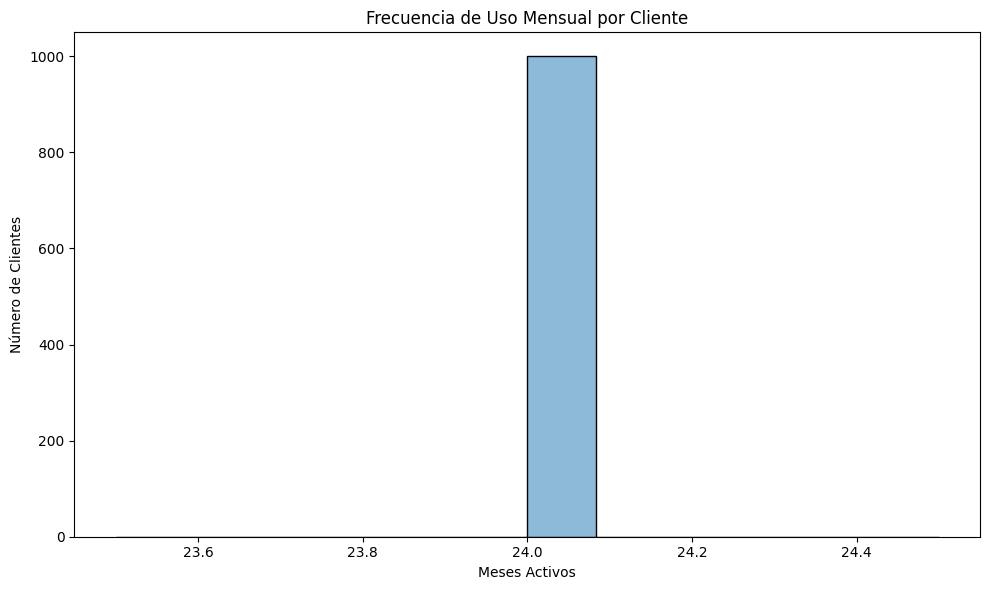

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clientes['frecuencia_mensual'], bins=12, kde=True)
plt.title("Frecuencia de Uso Mensual por Cliente")
plt.xlabel("Meses Activos")
plt.ylabel("Número de Clientes")
plt.tight_layout()
plt.show()

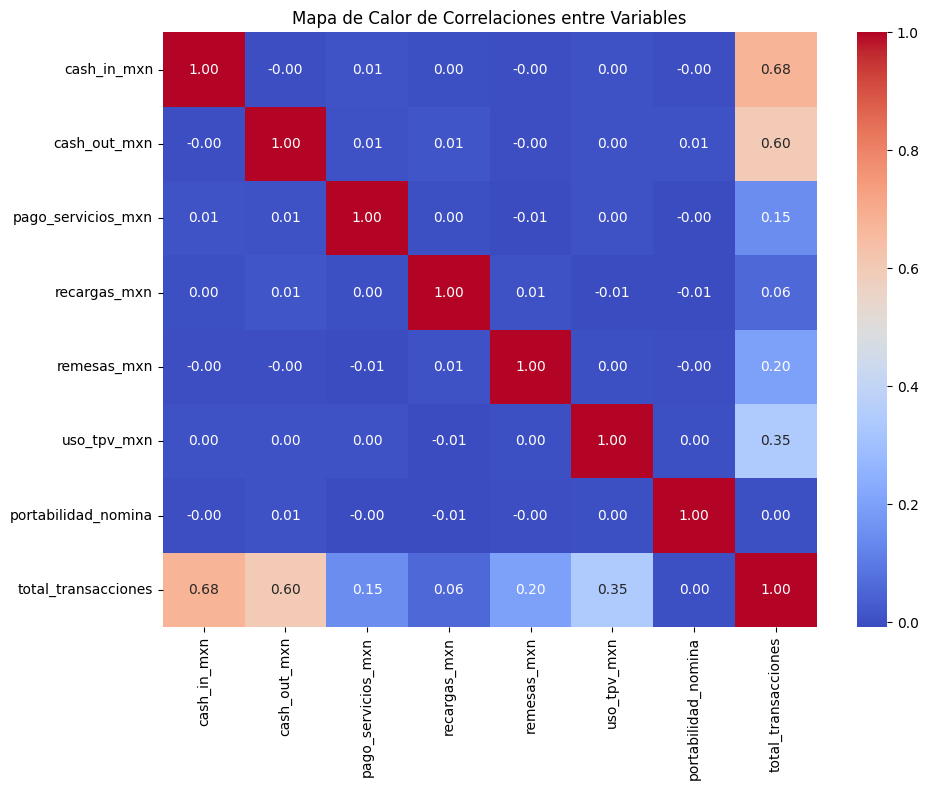

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=['cliente_id', 'fecha', 'mes', 'segmento']).corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlaciones entre Variables")
plt.tight_layout()
plt.show()

Agrupar usuarios por:

* Altos fondeadores (cash_in_mxn > Q75)
* Altos transaccionadores (uso_tpv_mxn + pago_servicios_mxn + recargas_mxn > media)
* Remesados (remesas_mxn > 0)
* Nómina activa

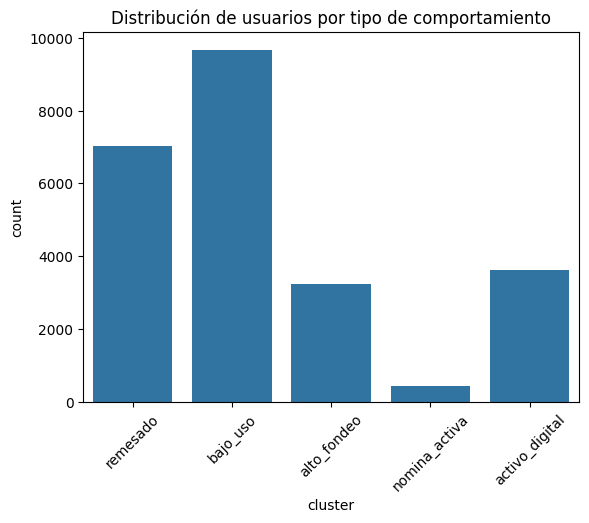

In [41]:
# Creamos etiquetas
df['cluster'] = 'bajo_uso'
df.loc[df['cash_in_mxn'] > df['cash_in_mxn'].quantile(0.75), 'cluster'] = 'alto_fondeo'
df.loc[(df['uso_tpv_mxn'] + df['pago_servicios_mxn'] + df['recargas_mxn']) > 2000, 'cluster'] = 'activo_digital'
df.loc[df['remesas_mxn'] > 0, 'cluster'] = 'remesado'
df.loc[df['portabilidad_nomina'] == 1, 'cluster'] = 'nomina_activa'

sns.countplot(x='cluster', data=df)
plt.title('Distribución de usuarios por tipo de comportamiento')
plt.xticks(rotation=45)
plt.show()


# Tendencias mensuales

Visualizar la evolución de las transacciones a lo largo del tiempo. De esta manera se podran detectar estacionalidades o efectos de compañas.

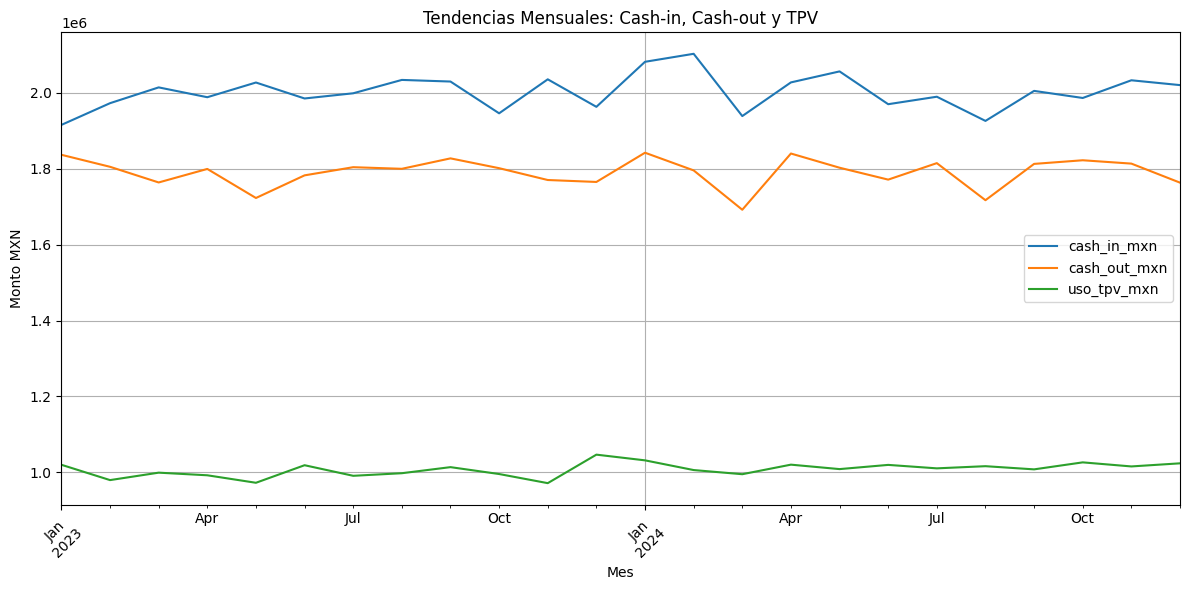

In [32]:
# Agrupar por mes para análisis temporal
df_mensual = df.groupby('mes').agg({
    'cash_in_mxn': 'sum',
    'cash_out_mxn': 'sum',
    'uso_tpv_mxn': 'sum',
    'pago_servicios_mxn': 'sum',
    'recargas_mxn': 'sum',
    'remesas_mxn': 'sum'
}).reset_index()

# Grafica de tendencias mensuales
df_mensual.set_index('mes')[['cash_in_mxn', 'cash_out_mxn', 'uso_tpv_mxn']].plot(figsize=(12, 6))
plt.title("Tendencias Mensuales: Cash-in, Cash-out y TPV")
plt.ylabel("Monto MXN")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Métricas y evolución de comportamiento

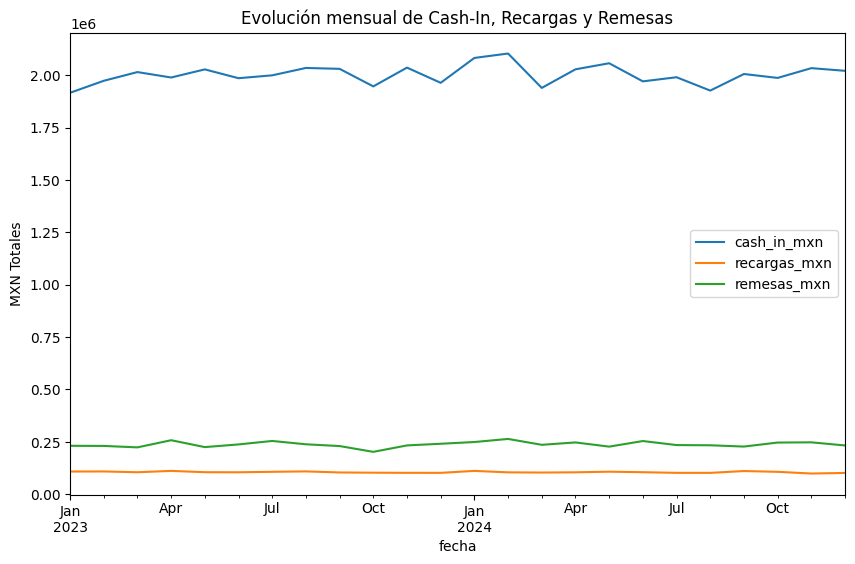

In [42]:
# Evolución mensual de cash-in y recargas
df_monthly = df.groupby('fecha')[['cash_in_mxn', 'recargas_mxn', 'remesas_mxn']].sum()
df_monthly.plot(figsize=(10,6), title='Evolución mensual de Cash-In, Recargas y Remesas')
plt.ylabel("MXN Totales")
plt.show()


# Pagos, recargas y remesas

Comparar el compartamiento de verticales clave, así como informar decisiones sobre bundles o integraciones.

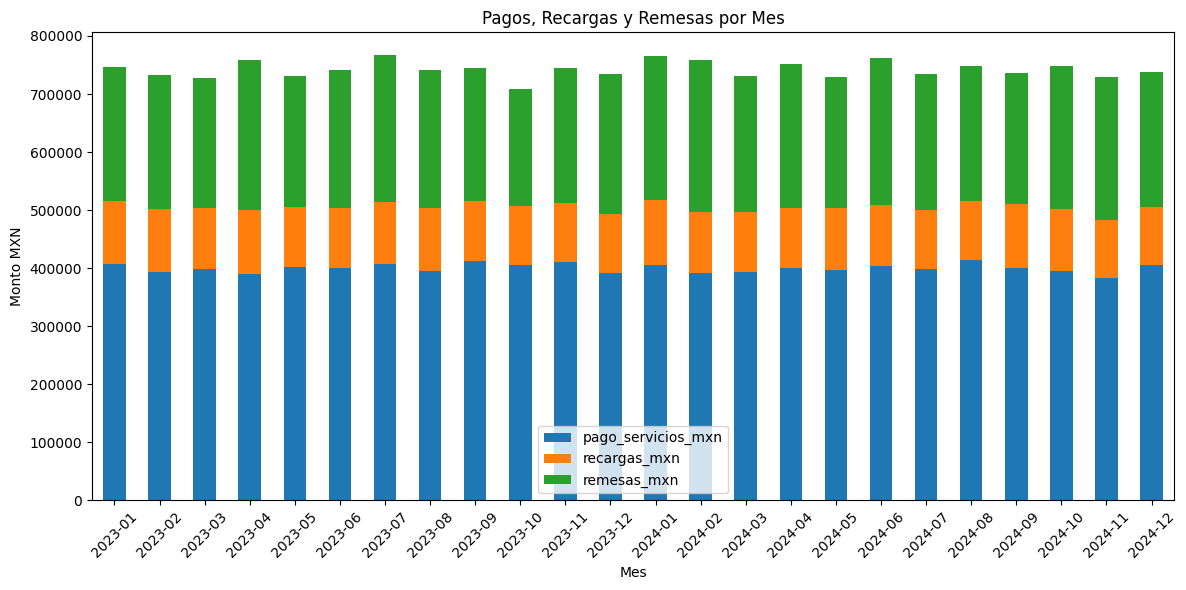

In [24]:
df_mensual.set_index('mes')[['pago_servicios_mxn', 'recargas_mxn', 'remesas_mxn']].plot(
    kind='bar', stacked=True, figsize=(12, 6))
plt.title("Pagos, Recargas y Remesas por Mes")
plt.ylabel("Monto MXN")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribución de portabilidad de nómina



*   Mostrar cuántos clientes tiene activada esta funcionalidad de nómina.
*   Informar sobre el potencial de fondeo recurrente.



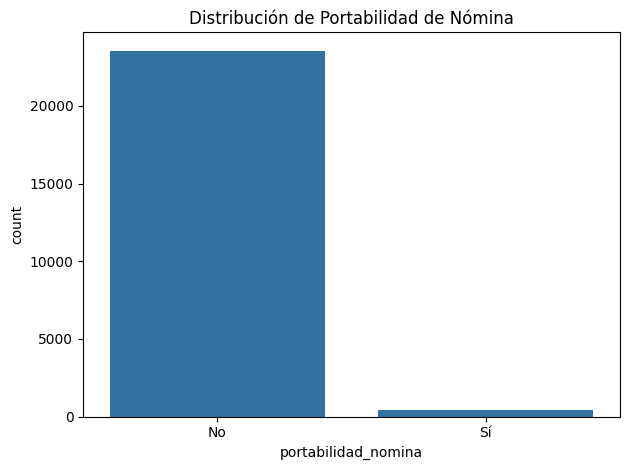

In [25]:
sns.countplot(x='portabilidad_nomina', data=df)
plt.title("Distribución de Portabilidad de Nómina")
plt.xticks([0, 1], ['No', 'Sí'])
plt.tight_layout()
plt.show()

In [33]:
# Cuantos tienen
portabilidad_counts = df['portabilidad_nomina'].value_counts()

# Imprimir resultados
print("Distribución de Portabilidad de Nómina:")
print(portabilidad_counts)

Distribución de Portabilidad de Nómina:
portabilidad_nomina
0    23553
1      447
Name: count, dtype: int64


# Resumen estadístico

In [29]:
# Resumen
resumen = df.describe()
resumen

,fecha,cash_in_mxn,cash_out_mxn,pago_servicios_mxn,recargas_mxn,remesas_mxn,uso_tpv_mxn,portabilidad_nomina,total_transacciones
count,24000,24000.000000,24000.000000,24000.00000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,2024-01-14 21:00:00,2002.442265,1790.522633,399.85000,104.982625,237.326667,1007.205805,0.018625,5542.329994
min,2023-01-31 00:00:00,9.170000,8.590000,0.00000,0.000000,0.000000,0.950000,0.000000,776.170000
25%,2023-07-23 06:00:00,955.515000,870.705000,200.00000,0.000000,0.000000,488.490000,0.000000,4028.115000
50%,2024-01-15 12:00:00,1686.270000,1499.635000,400.00000,92.000000,0.000000,844.670000,0.000000,5261.735000
75%,2024-07-07 18:00:00,2703.327500,2399.802500,600.00000,196.000000,320.000000,1347.160000,0.000000,6743.492500
max,2024-12-31 00:00:00,12648.670000,12142.630000,2000.00000,299.000000,1499.000000,6914.750000,1.000000,17724.300000
std,NaN,1414.292393,1257.781684,285.38285,102.463326,426.442434,710.597281,0.135199,2091.811084


In [28]:
# Segmentación de clientes
df_clientes.to_csv("segmentacion_clientes.csv", index=False)
print("Segmentación de clientes exportada como 'segmentacion_clientes.csv'")

Segmentación de clientes exportada como 'segmentacion_clientes.csv'


In [30]:
# Read the generated CSV file back into a DataFrame
df_segmentacion = pd.read_csv("segmentacion_clientes.csv")

# Display the DataFrame
display(df_segmentacion)

,cliente_id,ticket_promedio,frecuencia_mensual,segmento
0,C00000,5482.284167,24,Medio-Bajo
1,C00001,5247.339583,24,Bajo
2,C00002,4776.827500,24,Bajo
3,C00003,5897.835833,24,Alto
4,C00004,6388.331667,24,Alto
...,...,...,...,...
995,C00995,5638.080000,24,Medio-Alto
996,C00996,6095.092917,24,Alto
997,C00997,5812.767083,24,Medio-Alto
998,C00998,5230.009583,24,Bajo


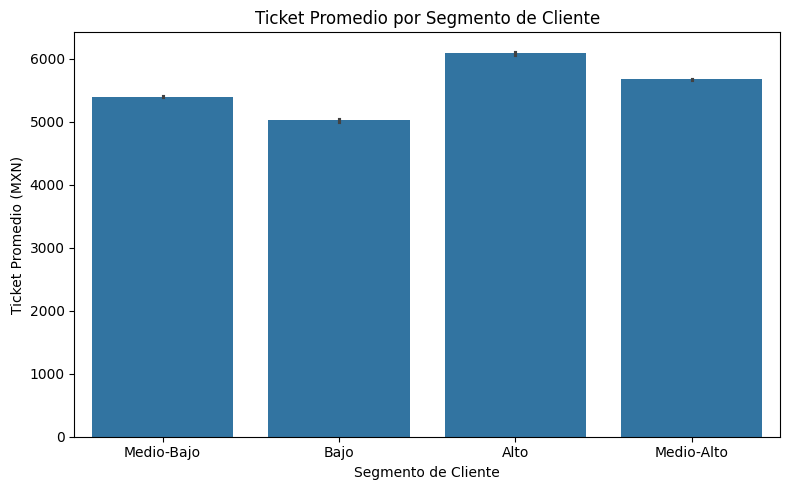

In [31]:
plt.figure(figsize=(8, 5))
sns.barplot(x='segmento', y='ticket_promedio', data=df_segmentacion)
plt.title("Ticket Promedio por Segmento de Cliente")
plt.ylabel("Ticket Promedio (MXN)")
plt.xlabel("Segmento de Cliente")
plt.tight_layout()
plt.show()

# KPI Proyectados vs Realidad

In [43]:
kpis = {
    'Usuarios activos con pagos recurrentes (>1000 MXN)': (df['pago_servicios_mxn'] > 1000).mean(),
    'Cash-in mensual promedio': df['cash_in_mxn'].mean(),
    'Recargas promedio': df['recargas_mxn'].mean(),
    'Usuarios con nómina activa': (df['portabilidad_nomina'] == 1).mean(),
    'Usuarios que reciben remesas': (df['remesas_mxn'] > 0).mean()
}

pd.DataFrame(kpis.items(), columns=['KPI', 'Valor actual'])


,KPI,Valor actual
0,Usuarios activos con pagos recurrentes (>1000 ...,0.018000
1,Cash-in mensual promedio,2002.442265
2,Recargas promedio,104.982625
3,Usuarios con nómina activa,0.018625
4,Usuarios que reciben remesas,0.297375


## Conclusiones Estratégicas
Los usuarios con nómina activa tienden a tener mayor cash-in, lo que valida su valor estratégico.
Hay un porcentaje importante de usuarios con comportamiento bajo, que podrían activarse con campañas personalizadas.
Las remesas representan una fuente de fondeo poco explotada.
El segmento "activo_digital" puede representar una base sólida para impulsar productos adicionales.

## Recomendaciones Estratégicas

1. **Incentivar la portabilidad de nómina**, ya que estos usuarios presentan mayor fondeo y uso de servicios.

2. **Segmentar a usuarios "remesados"** con productos de ahorro o créditos pequeños, aprovechando su liquidez recurrente.

3. **Usuarios de bajo uso** podrían activarse mediante campañas con beneficios por usar TPV o pagos de servicios por primera vez.

4. Establecer **alianzas con tiendas de conveniencia** para ampliar el cash-out en zonas donde el uso de tarjeta es bajo.

5. **Gamificación o cashback** por lograr metas mensuales de pagos o recargas puede mejorar el engagement y el LTV.
